# Logistic Regression

Helpful Tutorial: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

**Logistic Regression** is used to model the probability of a dependent variable. The dependent variable in this case is 'RainTomorrow'. This variable will have 2 options: 'RainTomorrow'=0 (No Rain) or 'RainTomorrow'=1 (Yes Rain).

There are some important things to assumptions which need to be made when using Logistic Regression. These are as follows:


*   Binary logistic regression requires the dependent variable to be binary.
*   For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
*   Only the meaningful variables should be included.
*   The independent variables should be independent of each other. That is, the model should have little or no multicollinearity. *[Important]*
*   The independent variables are linearly related to the log odds.
*   Logistic regression requires quite large sample sizes.

**Going to start by importing all necessary packages/libraries.**











In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from statsmodels.compat import lzip
import statsmodels.formula.api as sm
import statsmodels.stats.stattools as st
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pointbiserialr

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Mount the Google Drive to Google Colab.**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


**Read cleaned dataset into a dataframe.**

In [0]:
data = '/content/drive/My Drive/cleanedData.csv'
df = pd.read_csv(data, index_col=0)    

**Describe the imported data.**

In [6]:
df.describe()             

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
count,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.00000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000,107868.000000
mean,0.496383,0.482800,0.052962,0.448955,0.343041,0.406290,0.633498,0.503439,0.507237,0.507078,0.492010,0.480807,0.208004,0.207596,0.070549,0.06113,0.055818,0.065895,0.054826,0.049459,0.046075,0.055438,0.067842,0.072005,0.068695,0.065664,0.067991,0.073191,0.057969,0.067453,0.060509,0.058840,0.061714,0.062475,0.059832,0.047354,0.053213,0.054752,0.072079,0.074508,0.068667,0.059221,0.068556,0.069149,0.060166,0.068964,0.071940,0.061946,0.059897,0.083018,0.057413,0.061677,0.057209,0.057645,0.066266,0.070327,0.072607,0.055429,0.062067,0.058080,0.052332,0.052147
std,0.167163,0.170806,0.139463,0.163936,0.207134,0.190897,0.207999,0.204046,0.159936,0.160463,0.168191,0.171743,0.405882,0.405588,0.256071,0.23957,0.229571,0.248100,0.227642,0.216825,0.209648,0.228834,0.251476,0.258497,0.252936,0.247694,0.251731,0.260451,0.233686,0.250806,0.238429,0.235327,0.240637,0.242016,0.237177,0.212396,0.224459,0.227497,0.258620,0.262597,0.252889,0.236038,0.252699,0.253709,0.237795,0.253394,0.258389,0.241059,0.237298,0.275911,0.232631,0.240570,0.232242,0.233071,0.248748,0.255698,0.259492,0.228816,0.241278,0.233896,0.222698,0.222325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.374332,0.350617,0.000000,0.328767,0.189189,0.261905,0.505618,0.360000,0.399050,0.393285,0.367021,0.350254,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.489305,0.471605,0.00000

**Drop the 'Date' column from the dataset.** We might need to do this as part of the cleaning.

# 1.Balancing the datset.

**We need to determine if our predictor variable 'RainTomorrow' is well balanced.**


*   Cell 1: Counts of No(0.0) and Yes(1.0) instances in the 'RainTomorrow' column.
*   Cell 2: Percentage of No(0.0) and Yes(1.0) instances in the 'RainTomorrow' column.
*   Cell 3: Graph describing instances of No(0.0) and Yes(1.0) instances in the 'RainTomorrow' column.


In [7]:
df['RainTomorrow'].value_counts()

0.0    85475
1.0    22393
Name: RainTomorrow, dtype: int64

In [8]:
no_rain = len(df[df['RainTomorrow']==0])
rain = len(df[df['RainTomorrow']==1])

pct_of_no_rain = no_rain/(no_rain+rain)
print("Percentage of 'RainTomorrow'=0 is: ", pct_of_no_rain*100)

pct_of_rain = rain/(no_rain+rain)
print("Percentage of 'RainTomorrow'=1' is: ", pct_of_rain*100)

Percentage of 'RainTomorrow'=0 is:  79.24036785701041
Percentage of 'RainTomorrow'=1' is:  20.759632142989577


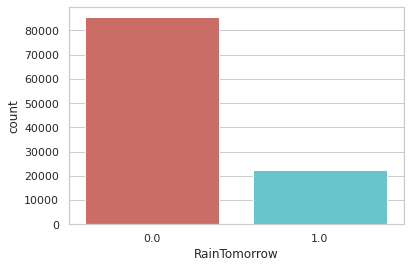

In [9]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x='RainTomorrow', data=df, palette='hls')
plt.show()

**From the above, we can conclude that our predictor variable 'RainTomorrow' is not well balanced.** To deal with this, we're going to up-sample the Yes(1.0) using the SMOTE algorithm. To ensure this has been done correctly, we observe the output from the following cell.

* **Dealing With Imbalance:** *One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.*

In [10]:
X = df.loc[:, df.columns != 'RainTomorrow']
y = df.loc[:, df.columns == 'RainTomorrow']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['RainTomorrow'])

# Merge the dataframes to create a new 'balanced' dataframe.
new_df = os_data_X
new_df['RainTomorrow'] = os_data_y

# Check the data to ensure it is correct:
print("Length of oversampled data: ", len(os_data_X))
print("Number of RainTomorrow=0 in oversampled data: ", len(os_data_y[os_data_y['RainTomorrow']==0]))
print("Number of RainTomorrow=1 in oversampled data: ", len(os_data_y[os_data_y['RainTomorrow']==1]))
print("Proportion of RainTomorrow=0 in oversampled data: ", len(os_data_y[os_data_y['RainTomorrow']==0])/len(os_data_X))
print("Proportion of RainTomorrow=1 in oversampled data: ", len(os_data_y[os_data_y['RainTomorrow']==1])/len(os_data_X))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

Length of oversampled data:  136692
Number of RainTomorrow=0 in oversampled data:  68346
Number of RainTomorrow=1 in oversampled data:  68346
Proportion of RainTomorrow=0 in oversampled data:  0.5
Proportion of RainTomorrow=1 in oversampled data:  0.5


**Check to make sure our new sample is well balanced.**

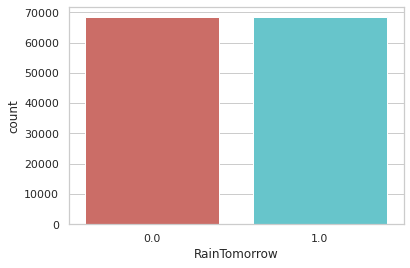

In [11]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

sns.countplot(x='RainTomorrow', data=new_df, palette='hls')
plt.show()

# 2.Feature Selection

**Next, we're going to try determine the best features to use when predicting the outcome variable.** 

One kernel on Kaggle uses 'SelectKBest' which selects features according to the k highest scores. When we do this, we see that the top 3 features are: *'Rainfall'*, *'Humidity3pm'*, and *'RainToday'*.

In [12]:
#Using SelectKBest to get the top features!

from sklearn.feature_selection import SelectKBest, chi2
X = new_df.loc[:,new_df.columns!='RainTomorrow']
y = new_df[['RainTomorrow']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) 

Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


**Next, we need to complete a number of plots and a correlation analysis to examine the relationship between variables.** If 2 variables are highly correlated then it is appropriate to drop one of these variables from the model. (To avoid Multicollinearity).


'Rainfall' and 'Humidity3pm' are both continuous variables so a standard correltaion graph should work fine for determining the correlation between these two.

As 'RainToday' contains binary data, and we want to determine the correltation between this and our other continuous variables, we will need to use the Point Biserial Correlation.



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


,Rainfall,Humidity3pm,RainToday
Rainfall,1.000000,0.338436,0.715282
Humidity3pm,0.338436,1.000000,0.409114
RainToday,0.715282,0.409114,1.000000


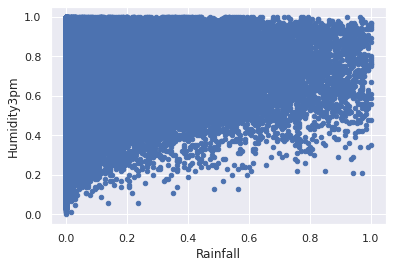

In [13]:
sns.set()
%matplotlib inline

# Scatter Plot for 'Rainfall' and 'Humidity3pm'
new_df.plot.scatter(x='Rainfall', y='Humidity3pm')

corr = new_df[['Rainfall','Humidity3pm','RainToday']].corr()
corr.style.background_gradient(cmap='coolwarm')

In [14]:
# Point Biserial Correlation
rainfall = new_df['Rainfall']
rainToday = new_df['RainToday']
humidity = new_df['Humidity3pm']

# Point Biseral for 'Rainfall' and 'RainToday'
pbc = pointbiserialr(rainfall, rainToday)
print("Point Biserial of Rainfall and RainToday:")
print(pbc)
print("\n")

# Point Biseral for 'Humidity3pm' and 'RainToday'
pbc = pointbiserialr(humidity, rainToday)
print("Point Biserial of Humidity and RainToday:")
print(pbc)


Point Biserial of Rainfall and RainToday:
PointbiserialrResult(correlation=0.7152821172367997, pvalue=0.0)


Point Biserial of Humidity and RainToday:
PointbiserialrResult(correlation=0.40911446597510576, pvalue=0.0)


**Point Biserial Correlation:** From the above, we can see that there appears to be a strong correlation between the continuous variable 'Rainfall' and the binary varaible 'RainToday' (correlation = 0.718). For this reason, we can drop one of these variables which will avoid introducing multicollinearity into our model. The **p-value** is explained as follows:

*   A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
*   If the p-value is LESS THAN .05, then researchers have evidence of a statistically significant bivariate association between the two continuous variables.






**Variance Inflation Factor (VIF):**

The 3 independent variables do appear to have some correlation between them, but we cannot be sure how this will affect our model. In order to assess this we should really examine the multi-collinearity between all the independent variables. 

Interpreting the VIF:

*   1 = not correlated.
*   Between 1 and 5 = moderately correlated.
*   Greater than 5 = highly correlated.
*   Greater than 10 = you really need to consider dropping variables from your model. 




While 'Rainfall' and 'RainToday' are correlated (from analysis above), the variance inflation factor indicates that there is little multicollinearity between the variables.

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant

X=new_df[['Rainfall','Humidity3pm','RainToday']]
X = add_constant(X)
y=new_df['RainTomorrow']
vif = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.to_numpy().shape[1])]

print(vif[1:])


[2.0582408066159084, 1.2072490114385748, 2.1888505350837413]


# 3.Implementing the Model:

Now, we need to run a number of logistic regression models, and see which one makes the most sense.

In [16]:
import statsmodels.api as sm
import statsmodels.discrete.discrete_model as sml

X=new_df[['Rainfall','Humidity3pm','RainToday']]  
#X=new_df[['Rainfall','Humidity3pm']]              
#X=new_df[['Humidity3pm','RainToday']]
#X=new_df[['Rainfall','RainToday']]
#X=new_df[['Rainfall']]
#X=new_df[['Humidity3pm']]
#X=new_df[['RainToday']]

X = add_constant(X)
y = new_df['RainTomorrow']

logit = sml.Logit(y, X).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.518181
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:               136692
Model:                          Logit   Df Residuals:                   136688
Method:                           MLE   Df Model:                            3
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                  0.2524
Time:                        09:05:17   Log-Likelihood:                -70831.
converged:                       True   LL-Null:                       -94748.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.8470      0.025   -156.996      0.000      -3.895      -3.799
Rainfall        1.1505    

# 4.Logstic Regression Classification Report

**Analysis of the above table:**

In order to determine which model is most appropriate we take the Pseudo R-squ, the pvalues (P>|z|) and the LLR p-value into account. We are looking for a model in which we have the highest R-squ value and where the LLR p-value is highly significant.

*   **Pseudo R-squ**: Values here vary from 0 (when the model does not improve the likelihood) to 1 (where the model fits perfectly and the log-likelihood is maximized at 0).
*   **LLR p-value**: Tells us if the model is significantly better than the null model. 





**Accuracy, F1 Score and AUC:**

We will now examine the accuracy, F1 score and the AUC. 
In the following code window we can run a clasification report which gives a number of statistics. The explaination for these statistics is as follows:

* **accuracy** (correct decisions/total no. of decisions)
* **precision** (True positives/(True Positives+False Positivies))
* **recall** (True positives/(True Positives + False Negatives))
* **f1-scrore** (Formula including precision and recall)
* **support** (The number of items in the class)

In classification problems we need to be very careful not to over rely on the accuracy score. It can often be the case that a high accuracy could be found, however, we may need to put more emphasis on identifying a particular class. So for example if we were trying to identify critically ill patients from a rare disease we would most likely get a high accuaracy as we would identify the majority of patients who were not ill, but diagnose someone as not being ill when in fact they are seriously ill. This is the reason why some authors report a F1-score. However, this to has been criticized has it treats precision and recall equally.

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y, np.round_(logit.predict(),0)))

              precision    recall  f1-score   support

         0.0       0.75      0.74      0.74     68346
         1.0       0.74      0.75      0.75     68346

    accuracy                           0.75    136692
   macro avg       0.75      0.75      0.75    136692
weighted avg       0.75      0.75      0.75    136692



Logistic Regression Confusion Matrix

**Confusion Matrix:** From the confusion matrix below, we see the percentage of correctly classified variables is as follows:
* 0.0: (50638)/(50638+17708) = 74% **[Similar to F1 Score Above]**
* 1.0: (51360)/(51360+16986) = 75% **[Similar to F1 Score Above]**

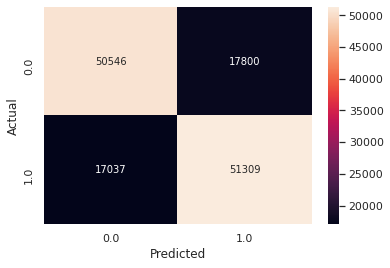

In [18]:
confusion_matrix = pd.crosstab(y, np.round_(logit.predict(),0), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='g')

# 5.Logistic Regression ROC Curve

Finally for logistic regression models we should build a Receiver Operating Characteristic (ROC) curve and determine the Area Under the Curve (AUC). A ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings. The higher the AUC the better the classifier.

**Simple English:** The ROC curve can be used to help determine the cutoff point which optimizes sensitivity and specificity for a given test. It can also be used to assess the overall diagnostic accuracy of a test. An finally, it can be used to compare a couple of diagnostic tests for the same 'disorders'.

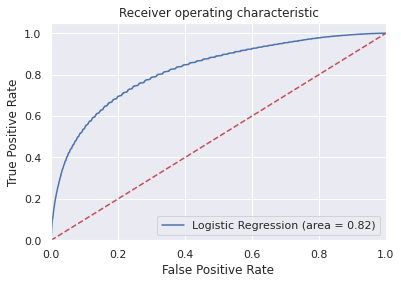

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y, logit.predict(X))
fpr, tpr, thresholds = roc_curve(y, logit.predict(X))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Interpreting our ROC Curve:**

* The Y axis is the sensitivity (True Positive Rate) and the X axis is 1-specificity (False Positive Rate).

* The diagonal line indicates where a useless test would fall.

* We can determine the overall accuracy of a test using the Area Under ROC (AUC). We want the area under the ROC curve to be as high as possible. In this case, our AUC is 0.82.

**Logistic Regression Model Fitting**

The final step is to split our dataset (80% traininag and 20% testing) and see how our model performs on the test data.

The results presented below indicate that the accuracy of our logistic regression classifier (on the test set) is 0.74794 **[Which was expected].**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74666
